In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pingouin as pg
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
# load
datapath = '../csv/ptm-wm.csv'
data = pd.read_csv(datapath)

# reorganize
df = data[['studyID', 'group', 'k1var', 'k2var', 'k4var']]
df = df.rename(columns={'k1var': 'kvar1', 'k2var': 'kvar2', 'k4var': 'kvar4'})

# wide to long
df = pd.wide_to_long(df, stubnames='kvar', i=['studyID','group'], j='setsize')
df.reset_index(inplace=True) 

# Plot WM

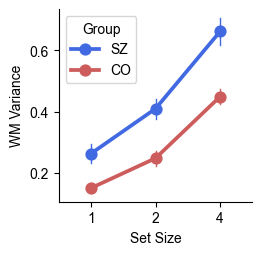

In [3]:
f = plt.figure()
f.set_size_inches(2.5,2.5)
colors = ['royalblue', 'indianred']

sns.pointplot(data=df, x='setsize', y='kvar', hue='group', errorbar=('ci', 68), palette=colors, native_scale=False, err_kws={'linewidth': 1})
plt.xlabel('Set Size')
plt.ylabel('WM Variance')
plt.legend(title='Group')

sns.despine()

plt.savefig('wm.pdf', dpi=300, transparent=True, bbox_inches="tight")


# Effect of Set Size on WM variance in CO

In the visual WM task, neurotypical adults (NT) exhibited the expected pattern of greater WM variance, with increasing set size (F(2, 58) = 200.42, p < .001)

In [4]:
# select CO data
df_CO = df[df['group']=='CO']

# repeated measures ANOVA
aov_CO = pg.rm_anova(data=df_CO, dv='kvar', within='setsize', subject='studyID')
aov_CO

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,setsize,2,58,200.422682,8.934860e-27,0.50753,0.840088


# Group x Set Size on WM variance

The SZ group exhibited higher WM recall variance across all set sizes relative to NT (F(1,55) = 18.04, p < .001). 
There was also a significant group by set size interaction, F(2,110) = 5.05, p = .008, with patients showing greater deficits at larger set sizes. 


In [5]:
aov = pg.mixed_anova(data=df, dv='kvar', between='group', within='setsize', subject='studyID')
aov.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,group,1.12833,1,55,1.12833,18.04202,0.00008,NaN,0.24701,NaN,NaN,NaN,NaN
1,setsize,3.53399,2,110,1.76700,249.30793,0.00000,0.0,0.81926,0.64214,False,0.44272,0.0
2,Interaction,0.07151,2,110,0.03575,5.04457,0.00801,NaN,0.08401,NaN,NaN,NaN,NaN
